In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression



In [3]:
df= pd.read_csv("/content/detail_300BLK.csv")

In [4]:
df.sample(10)

,Ammo Name,Bullet Weight,Barrel Length,Muzzle,100 Yards,200 Yards,300 Yards,400 Yards,500 Yards,Muzzle.1,...,500 Yards.1,Muzzle.2,100 Yards.2,200 Yards.2,300 Yards.2,400 Yards.2,500 Yards.2,G1,G7,Sect. Density
2,Hornady 110 Grain V-MAX,110,16,2375,2094.0,1833.0,1596.0,NaN,NaN,1378,...,NaN,-1.5,3.2,0.0,-13.7,NaN,NaN,0.295,0.150,0.166
14,Barnes 110 Grain TAC-TX,110,16,2350,2070.0,1810.0,1574.0,1369.0,NaN,1349,...,NaN,-2.5,0.0,-5.7,-22.0,-52.5,NaN,0.294,0.153,0.166
9,Hornady Black 208 Grain A-MAX,208,16,1020,987.0,959.0,NaN,NaN,NaN,480,...,NaN,-1.5,0.0,-33.5,NaN,NaN,NaN,0.787,0.341,0.313
5,Fiocchi Extrema 125 Grain SST,125,16,2200,1944.0,1708.0,1496.0,1312.0,1166.0,1343,...,377.0,-0.54,0.0,-7.7,-27.5,NaN,NaN,0.305,NaN,0.188
0,Magtech 200 Grain FMJ,200,16,1017,980.0,948.0,920.0,NaN,NaN,459,...,NaN,-,0.0,-36.2,-110.9,NaN,NaN,0.570,0.253,0.301
8,Sellier & Bellot 147 Grain FMJ,147,16,2077,1882.0,1706.0,1547.0,1402.0,NaN,1411,...,NaN,-,0.0,-7.9,-27.7,-62.2,NaN,0.407,0.204,0.221
10,Prvi 125 Grain FMJ,125,16,2198,1935.0,1696.0,1486.0,NaN,NaN,1340,...,NaN,-,0.0,-2.7,-24.8,NaN,NaN,0.325,NaN,NaN
3,Fiocchi 150 Grain FMJ-BT,150,16,1950,1767.0,1597.0,1442.0,1305.0,1190.0,1266,...,472.0,-0.52,0.0,-9.7,-33.1,NaN,NaN,0.398,NaN,0.226
13,Sellier & Bellot 124 Grain FMJ,124,16,2165,1901.0,1669.0,1465.0,1286.0,NaN,1285,...,NaN,-,0.0,-7.7,-28.0,-64.5,NaN,0.309,0.165,0.187
4,Hornady 125 Grain HP American Gunner,125,16,2175,1932.0,1707.0,1504.0,NaN,NaN,1313,...,NaN,-1.5,3.9,0.0,-15.9,NaN,NaN,0.325,0.168,0.128


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ammo Name      17 non-null     object 
 1   Bullet Weight  17 non-null     int64  
 2   Barrel Length  17 non-null     int64  
 3   Muzzle         17 non-null     int64  
 4   100 Yards      16 non-null     float64
 5   200 Yards      16 non-null     float64
 6   300 Yards      15 non-null     float64
 7   400 Yards      8 non-null      float64
 8   500 Yards      4 non-null      float64
 9   Muzzle.1       17 non-null     int64  
 10  100 Yards.1    16 non-null     float64
 11  200 Yards.1    16 non-null     float64
 12  300 Yards.1    15 non-null     float64
 13  400 Yards.1    8 non-null      float64
 14  500 Yards.1    4 non-null      float64
 15  Muzzle.2       16 non-null     object 
 16  100 Yards.2    16 non-null     float64
 17  200 Yards.2    16 non-null     float64
 18  300 Yards.2 

In [7]:
df.columns

Index(['Ammo Name', 'Bullet Weight', 'Barrel Length', 'Muzzle', '100 Yards',
       '200 Yards', '300 Yards', '400 Yards', '500 Yards', 'Muzzle.1',
       '100 Yards.1', '200 Yards.1', '300 Yards.1', '400 Yards.1',
       '500 Yards.1', 'Muzzle.2', '100 Yards.2', '200 Yards.2', '300 Yards.2',
       '400 Yards.2', '500 Yards.2', 'G1', 'G7', 'Sect. Density'],
      dtype='object')

In [6]:
df.isnull().mean()

,0
Ammo Name,0.000000
Bullet Weight,0.000000
Barrel Length,0.000000
Muzzle,0.000000
100 Yards,0.058824
200 Yards,0.058824
300 Yards,0.117647
400 Yards,0.529412
500 Yards,0.764706
Muzzle.1,0.000000


In [8]:
sam=df.drop(columns=['Bullet Weight', 'Barrel Length', 'Muzzle', '100 Yards',
       '200 Yards', '300 Yards','Muzzle.1',
       '100 Yards.1', '200 Yards.1', '300 Yards.1','Muzzle.2', '100 Yards.2', '200 Yards.2', '300 Yards.2','G1', 'G7', 'Sect. Density'])

In [9]:
sam.columns

Index(['Ammo Name', '400 Yards', '500 Yards', '400 Yards.1', '500 Yards.1',
       '400 Yards.2', '500 Yards.2'],
      dtype='object')

In [10]:
sam.isnull().mean()

,0
Ammo Name,0.000000
400 Yards,0.529412
500 Yards,0.764706
400 Yards.1,0.529412
500 Yards.1,0.764706
400 Yards.2,0.647059
500 Yards.2,0.882353


In [15]:
fea=sam.drop(columns=['Ammo Name'])
tar=sam['Ammo Name']

In [16]:
xtr,xte,ytr,yte=train_test_split(fea,tar,test_size=0.3)

In [21]:
xtr.head(50)


,400 Yards,500 Yards,400 Yards.1,500 Yards.1,400 Yards.2,500 Yards.2
4,NaN,NaN,NaN,NaN,NaN,NaN
3,1305.0,1190.0,567.0,472.0,NaN,NaN
5,1312.0,1166.0,478.0,377.0,NaN,NaN
7,897.0,876.0,393.0,375.0,-154.7,-294.9
12,886.0,856.0,331.0,309.0,-217.3,-374.2
2,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN
14,1369.0,NaN,458.0,NaN,-52.5,NaN
8,1402.0,NaN,643.0,NaN,-62.2,NaN
13,1286.0,NaN,453.0,NaN,-64.5,NaN


In [25]:
xtr.columns

Index(['400 Yards', '500 Yards', '400 Yards.1', '500 Yards.1', '400 Yards.2',
       '500 Yards.2'],
      dtype='object')

<ipython-input-24-84f17f47cc8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[i],kde=True)


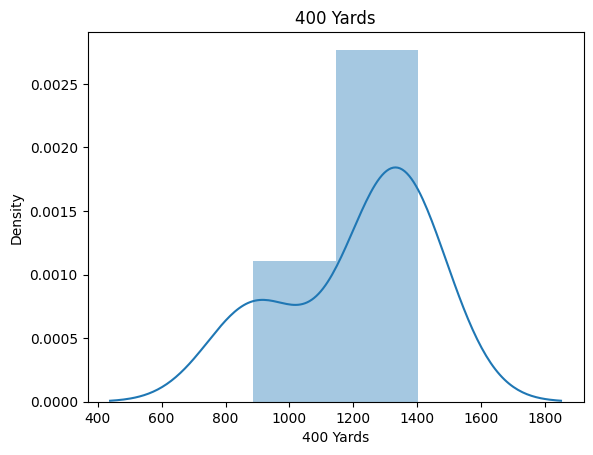

<ipython-input-24-84f17f47cc8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[i],kde=True)


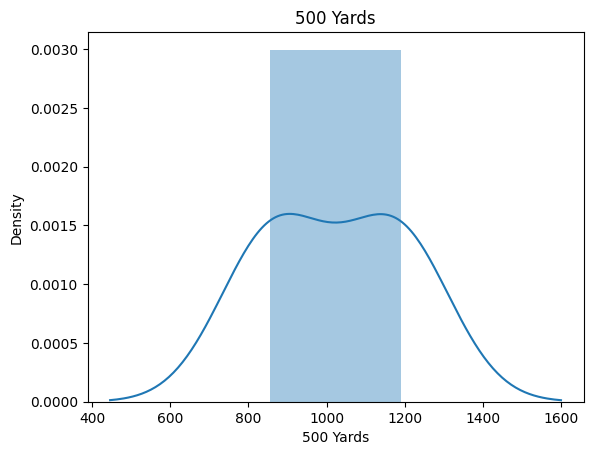

<ipython-input-24-84f17f47cc8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[i],kde=True)


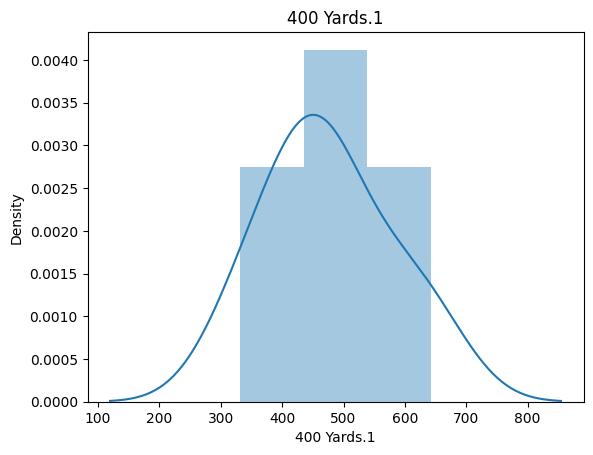

<ipython-input-24-84f17f47cc8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[i],kde=True)


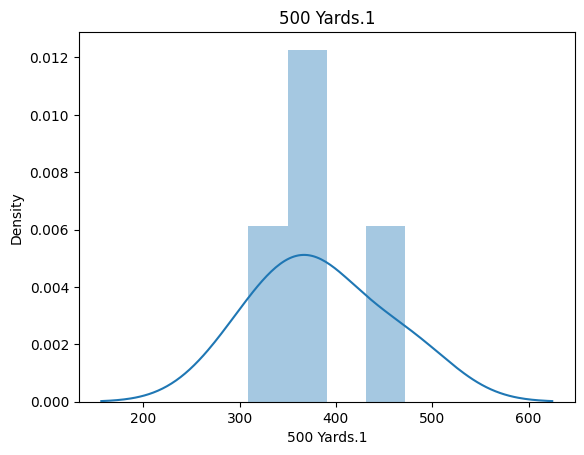

<ipython-input-24-84f17f47cc8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[i],kde=True)


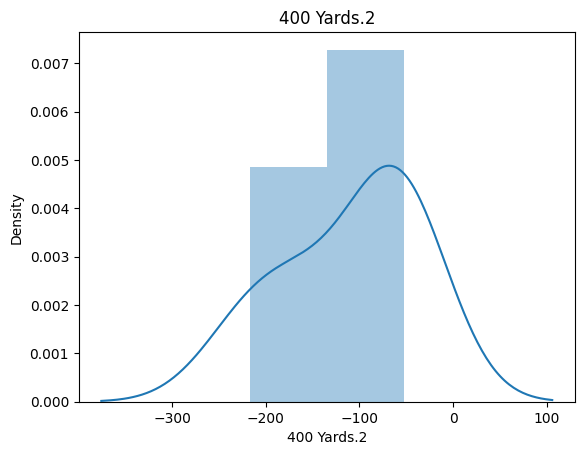

<ipython-input-24-84f17f47cc8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[i],kde=True)


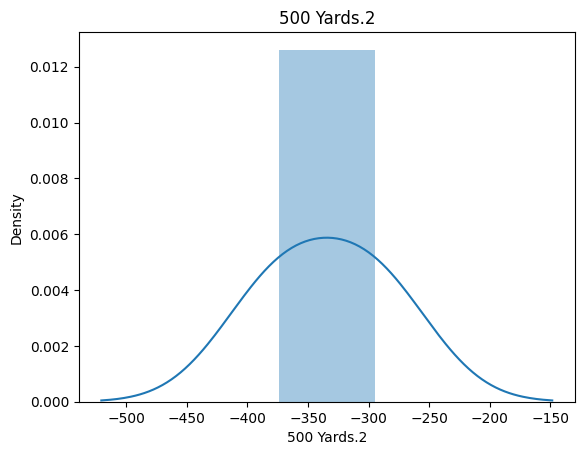

In [24]:
for i in xtr.columns:
  sns.distplot(xtr[i],kde=True)
  plt.title(i)
  plt.show()

In [30]:
#now using of simple imputer with column transformer
si=SimpleImputer(strategy='mean')
ct=ColumnTransformer(
    transformers= [
        ('t1',si,['400 Yards', '500 Yards', '400 Yards.1', '500 Yards.1', '400 Yards.2',
       '500 Yards.2'])
    ],
    remainder='passthrough'
)


In [35]:
xtr_si=ct.fit_transform(xtr)
xte_si=ct.transform(xte)

In [40]:
xtr_si_pd=pd.DataFrame(xtr_si)
xte_si_pd=pd.DataFrame(xte_si)

In [41]:
xtr_si_pd.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0


In [42]:
xte_si_pd.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0


<ipython-input-45-e0b3ddd252a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr_si[i],kde=True)


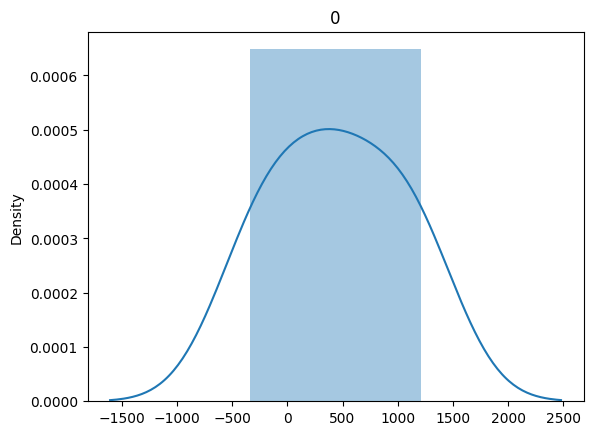

<ipython-input-45-e0b3ddd252a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr_si[i],kde=True)


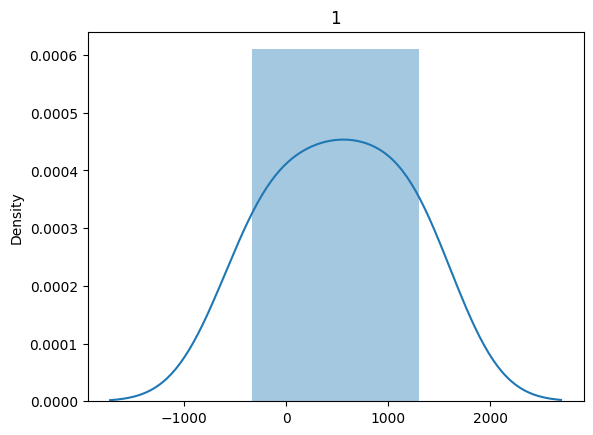

<ipython-input-45-e0b3ddd252a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr_si[i],kde=True)


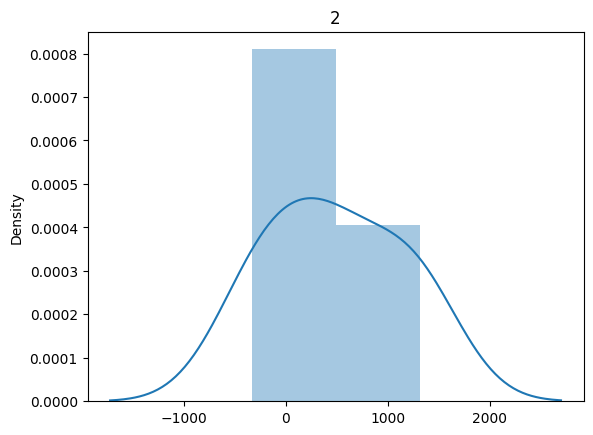

<ipython-input-45-e0b3ddd252a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr_si[i],kde=True)


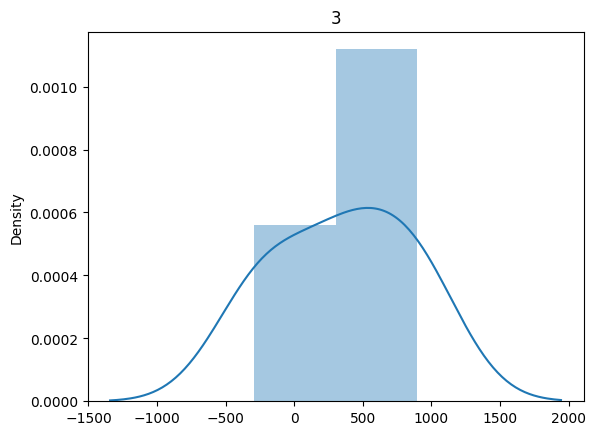

<ipython-input-45-e0b3ddd252a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr_si[i],kde=True)


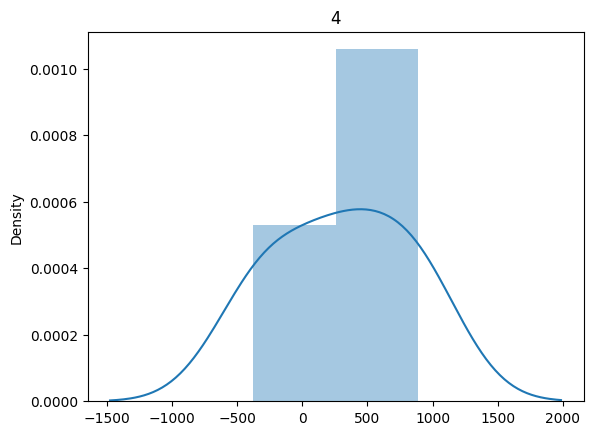

<ipython-input-45-e0b3ddd252a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr_si[i],kde=True)


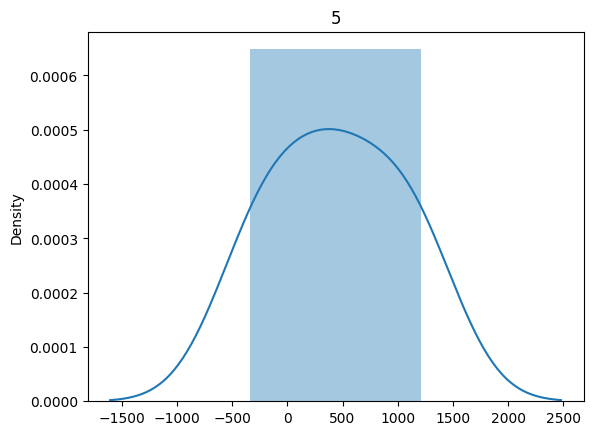

In [45]:
for i in xtr_si_pd.columns:
  sns.distplot(xtr_si[i],kde=True)
  plt.title(i)
  plt.show()

In [ ]:
#here we are going to see outlier detection and removal

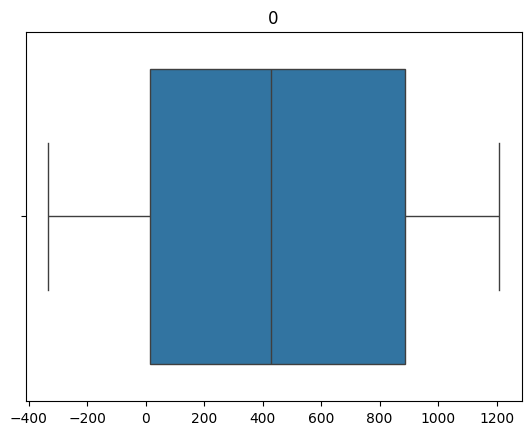

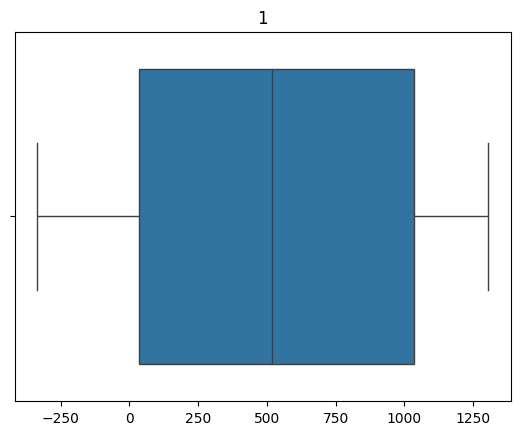

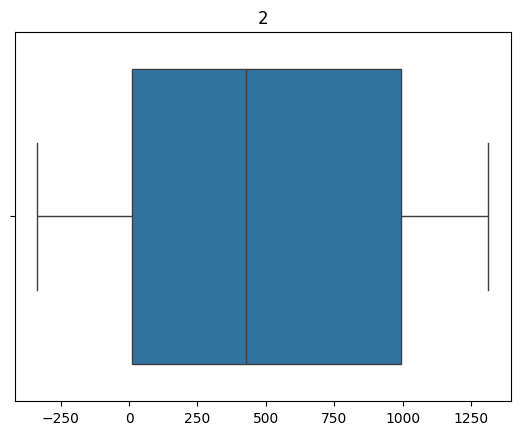

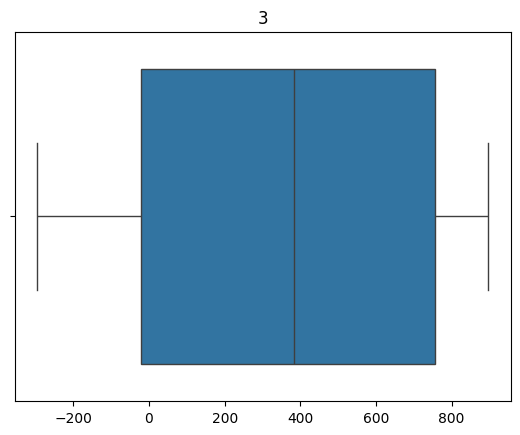

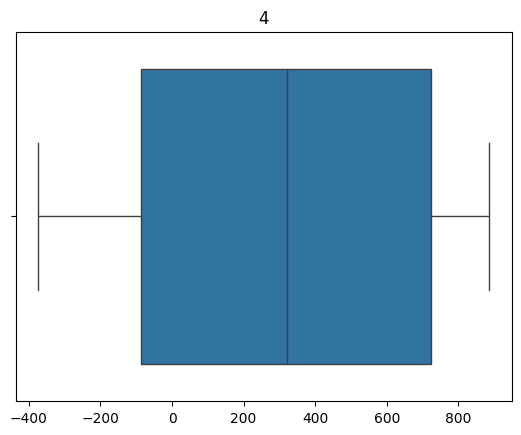

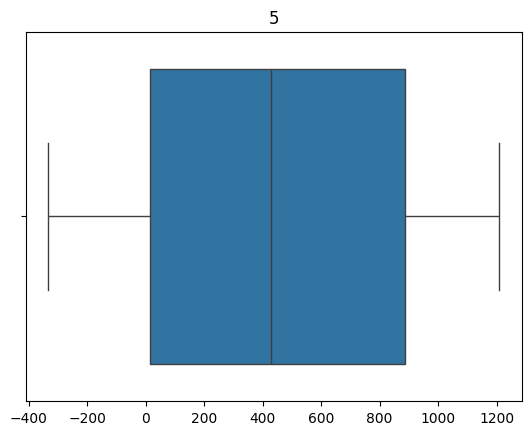

In [49]:
for i in xtr_si_pd.columns:
  sns.boxplot(x=xtr_si[i])
  plt.title(i)
  plt.show()

In [ ]:
#there is no outlier sothere is no need to remove it but we'll seeb boe tp remoc=ve outloer
#iqr method

q1=xtr_si_pd.quantile(0.25)
q3=xtr_si_pd.quantile(0.75)
iqr=q3-q1

lowerlimit=q1-1.5*iqr
upperlimit=q3+1.5*iqr